<a href="https://colab.research.google.com/github/nikhilkoduvalli/Machine_Learning/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1.0,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258,0,0.0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275,0,0.0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254,0,0.0,159.0,0,0.0,2,0.0,2.0,1


In [2]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,0
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [3]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,int64
fbs,int64
restecg,float64
thalach,float64
exang,int64
oldpeak,float64


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0


In [5]:
df['trestbps'].unique()



array([125., 140., 145., 148., 138., 100., 114., 160., 120., 122., 112.,
       132., 118., 128.,  nan, 124., 106., 104., 135., 130., 136., 180.,
       129., 150., 178., 146., 117., 152., 154., 170., 134., 174., 144.,
       108., 123., 110., 142., 126., 192., 115.,  94., 200., 165., 102.,
       105., 155., 172., 164., 156., 101.])

In [6]:
df['restecg'].unique()

array([nan,  0.,  1.,  2.])

In [7]:
df['thalach'].unique()

array([168., 155., 125.,  nan, 106., 122., 140., 145., 144., 116., 136.,
       192., 156., 142., 109., 162., 165., 148., 172., 173., 146., 179.,
       152., 117., 115., 112., 163., 147., 182., 105., 150., 151., 169.,
       166., 178., 132., 160., 123., 139., 111., 180., 164., 202., 157.,
       159., 170., 138., 175., 158., 126., 143., 141., 167.,  95., 190.,
       118., 103., 181., 108., 177., 134., 120., 171., 149., 154., 153.,
        88., 174., 114., 195., 133.,  96., 124., 131., 185., 194., 128.,
       127., 186., 184., 188., 130.,  71., 161., 137.,  99., 121., 187.,
        97.,  90., 129., 113.])

In [8]:
df['ca'].unique()

array([ 2.,  0.,  1.,  3., nan,  4.])

In [9]:
df['thal'].unique()

array([ 3.,  2.,  1.,  0., nan])

In [10]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['restecg']=df['restecg'].fillna(df['restecg'].mode()[0])
df['thalach']=df['thalach'].fillna(df['thalach'].mean())
df['ca']=df['ca'].fillna(df['ca'].mode()[0])
df['thal']=df['thal'].fillna(df['thal'].mode()[0])


In [11]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [12]:
x=df.iloc[:,:-1].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [13]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=7)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[130,  31],
       [ 12, 135]])

In [18]:
score=accuracy_score(y_test,y_pred)
score

0.8603896103896104

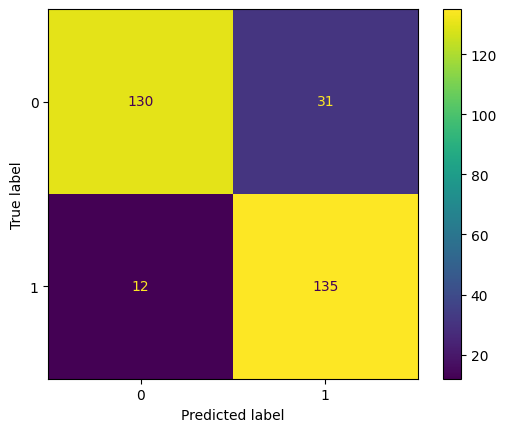

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
lab=['0','1']
cmd=ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()